In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('weather1.csv',
                 sep=';',
                 usecols=['Местное время в Перми', 'T', 'P', 'U', 'Ff', 'N', 'H', 'VV'],
                 encoding='utf-8')

print(f"\nПервые 5 строк:")
print(df.head())


Первые 5 строк:
  Местное время в Перми     T      P   U  Ff                          N  \
0      31.12.2021 23:00  -9.8  762.5  83   3                      100%.   
1      31.12.2021 20:00 -10.6  764.2  81   3                      100%.   
2      31.12.2021 17:00 -11.6  765.5  79   2  90  или более, но не 100%   
3      31.12.2021 14:00 -11.9  766.7  77   1                      100%.   
4      31.12.2021 11:00 -13.6  767.5  79   1                      100%.   

           H    VV  
0   600-1000   4.0  
1  1000-1500   4.0  
2  1000-1500  10.0  
3  1000-1500  20.0  
4  1000-1500  10.0  


2. Постройте точечную диаграмму (диаграмму рассеяния) по признакам температуры и относительной влажности.


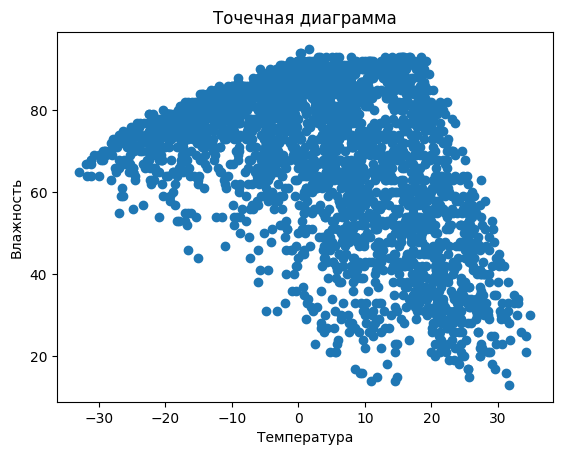

In [15]:
print("2. Постройте точечную диаграмму (диаграмму рассеяния) по признакам температуры и относительной влажности.")
plt.scatter(df['T'], df['U'])
plt.title('Точечная диаграмма')
plt.xlabel('Температура')
plt.ylabel('Влажность')
plt.show()

3. На построенной в предыдущем пункте диаграмме выделите точки разными цветами в зависимости от облачности: синим – для которых облачность составляет 100%; красным – все остальные.


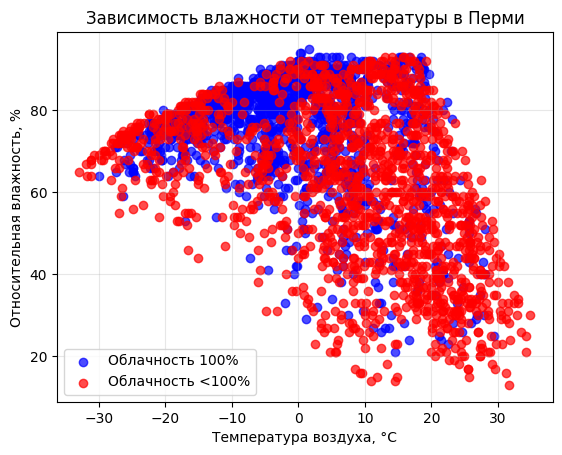

In [16]:
print("3. На построенной в предыдущем пункте диаграмме выделите точки разными цветами в зависимости от облачности: синим – для которых облачность составляет 100%; красным – все остальные.")
# Разделяем данные по облачности
full_clouds = df[df['N'] == "100%."]
other_clouds = df[df['N'] != "100%."]

# Строим точечную диаграмму с разными цветами
plt.scatter(full_clouds['T'], full_clouds['U'],
            color='blue', label='Облачность 100%', alpha=0.7)
plt.scatter(other_clouds['T'], other_clouds['U'],
            color='red', label='Облачность <100%', alpha=0.7)

plt.title('Зависимость влажности от температуры в Перми')
plt.xlabel('Температура воздуха, °C')
plt.ylabel('Относительная влажность, %')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

4. Постройте линейную диаграмму (график) изменения температуры в зависимости от местного времени.


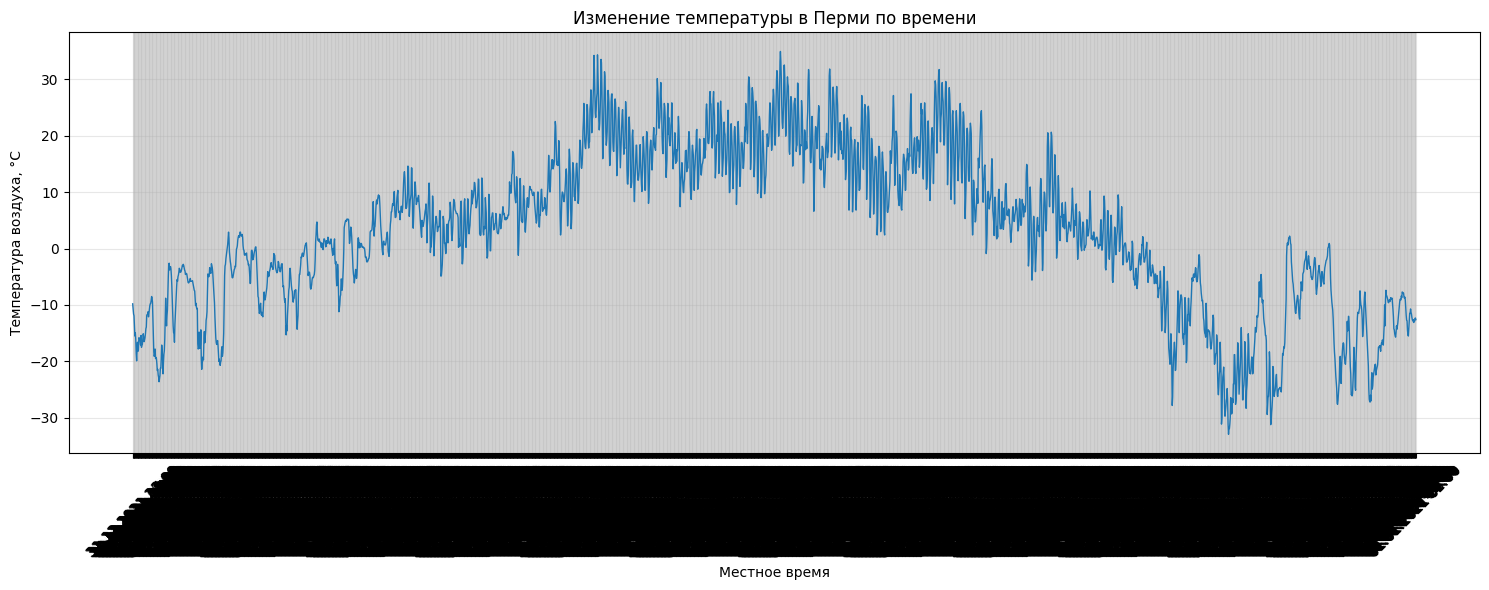

In [17]:
print("4. Постройте линейную диаграмму (график) изменения температуры в зависимости от местного времени.")
plt.figure(figsize=(15, 6))
plt.plot(df['Местное время в Перми'], df['T'], linewidth=1)

plt.title('Изменение температуры в Перми по времени')
plt.xlabel('Местное время')
plt.ylabel('Температура воздуха, °C')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

5. Посчитайте по имеющимся данным среднемесячную температуру и постройте столбчатую диаграмму (вертикальную) зависимости средней температуры от месяца. Подсказка: создайте отдельный столбец с номером месяца (вычислив его из столбца «Местное время»), а затем сгруппируйте данные по этому столбцу.


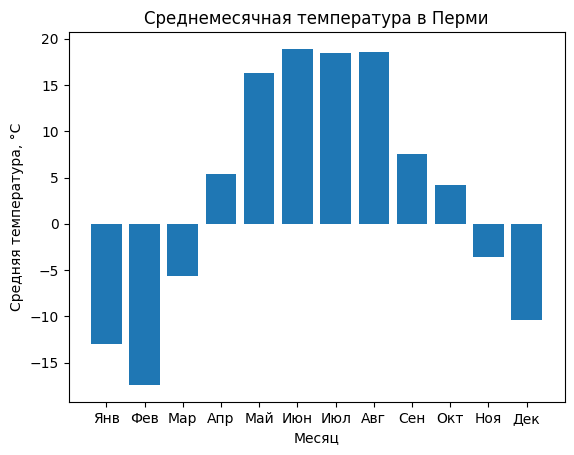

In [18]:
print("5. Посчитайте по имеющимся данным среднемесячную температуру и постройте столбчатую диаграмму (вертикальную) зависимости средней температуры от месяца. Подсказка: создайте отдельный столбец с номером месяца (вычислив его из столбца «Местное время»), а затем сгруппируйте данные по этому столбцу.")
df['month'] = pd.to_datetime(df['Местное время в Перми'], format='%d.%m.%Y %H:%M').dt.month #создаем столб с месяцем
monthly_avg_temp = df.groupby('month')['T'].mean() #индекс = номер месяца, значения = средняя температура

plt.bar(monthly_avg_temp.index, monthly_avg_temp.values) #номера месяцев по x, ср темп по у

plt.title('Среднемесячная температура в Перми')
plt.xlabel('Месяц')
plt.ylabel('Средняя температура, °C')
plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн',
                         'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.show()

6. Постройте ленточную диаграмму (горизонтальную), отразив на ней количество имеющихся наблюдений для каждого варианта облачности.


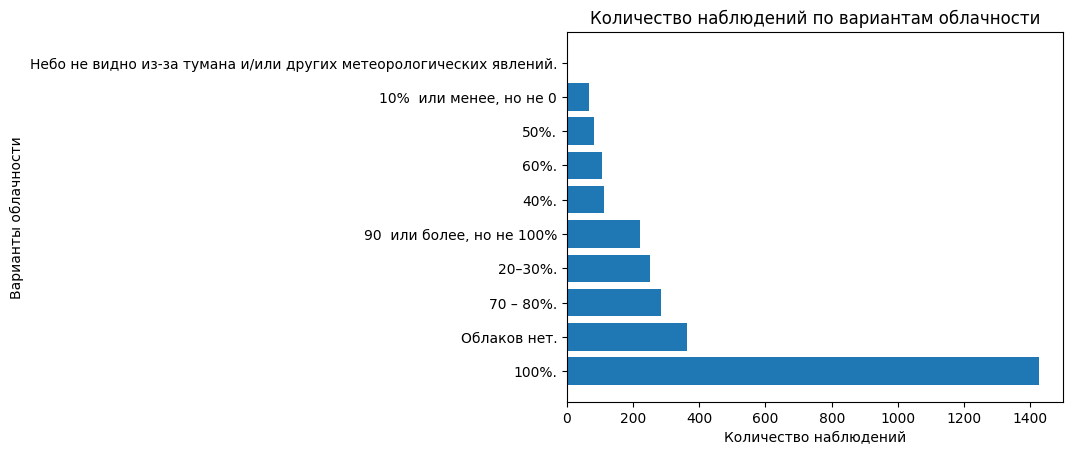

In [19]:
print("6. Постройте ленточную диаграмму (горизонтальную), отразив на ней количество имеющихся наблюдений для каждого варианта облачности.")
cloud_counts = df['N'].value_counts() #столбец с облачностью, сч кол во вхождений кажд уник зн, сортирует по убыванию

plt.barh(cloud_counts.index.astype(str), cloud_counts.values) #значения облачности по оси Y, кол во наблюд по оси X

plt.title('Количество наблюдений по вариантам облачности')
plt.xlabel('Количество наблюдений')
plt.ylabel('Варианты облачности')
plt.show()

7. Постройте гистограмму частот для температуры. На гистограмме должно быть 10 диапазонов температуры.


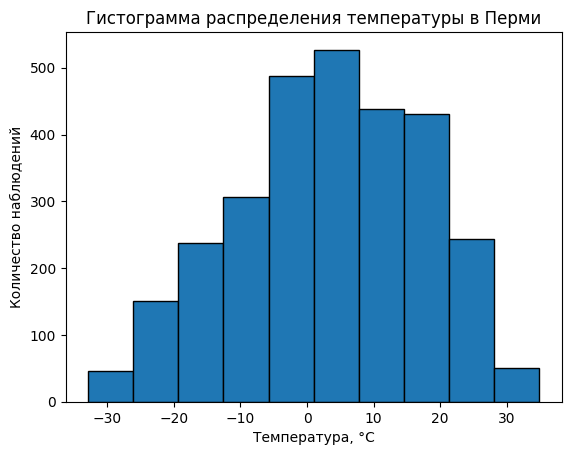

In [20]:
print("7. Постройте гистограмму частот для температуры. На гистограмме должно быть 10 диапазонов температуры.")
plt.hist(df['T'], bins=10, edgecolor='black')

plt.title('Гистограмма распределения температуры в Перми')
plt.xlabel('Температура, °C')
plt.ylabel('Количество наблюдений')
plt.show()

8. Разбейте данные на 3 группы по значению горизонтальной дальности видимости (одна группа – дальность видимости менее 5 км, вторая – от 5 до 15 км(включительно), третья – более 15 км). В одной области для каждой группы постройте boxplot (диаграмму «ящик с усами») для признака «атмосферное давление».


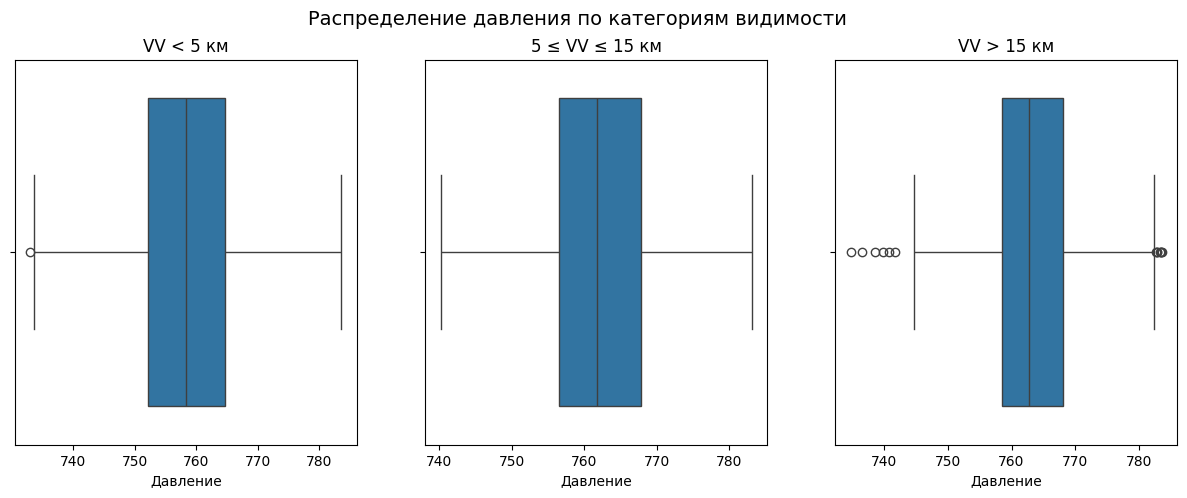

In [21]:
print("8. Разбейте данные на 3 группы по значению горизонтальной дальности видимости (одна группа – дальность видимости менее 5 км, вторая – от 5 до 15 км(включительно), третья – более 15 км). В одной области для каждой группы постройте boxplot (диаграмму «ящик с усами») для признака «атмосферное давление».")
less_than_5 = df[df['VV'] < 5].copy()  #булева маска для фильтрации
between_5_and_15 = df.query('5 <= VV <= 15').copy()
more_than_15 = df[df['VV'] > 15].copy()

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) #создаёт 1 стр и 3 столб графиков

sns.boxplot(x=less_than_5['P'], ax=axes[0]) #для диаграм ящик с усами, данные для оси х (атмосф давл)
axes[0].set_title('VV < 5 км')
axes[0].set_xlabel('Давление')

sns.boxplot(x=between_5_and_15['P'], ax=axes[1])
axes[1].set_title('5 ≤ VV ≤ 15 км')
axes[1].set_xlabel('Давление')

sns.boxplot(x=more_than_15['P'], ax=axes[2])
axes[2].set_title('VV > 15 км')
axes[2].set_xlabel('Давление')

plt.suptitle('Распределение давления по категориям видимости', fontsize=14)
plt.show()

9. Постройте круговую диаграмму для признака «высота основания облаков».


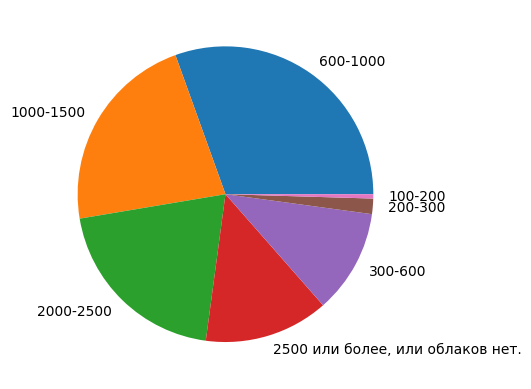

In [22]:
print("9. Постройте круговую диаграмму для признака «высота основания облаков».")
cloud_height_counts = df['H'].value_counts() #высота облака, кол во уник зн
fig, ax = plt.subplots() #оси
ax.pie(cloud_height_counts.values, labels=cloud_height_counts.index)
plt.show()